In [36]:
import numpy as np
import pandas as pd

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

In [35]:
!pip install imblearn

In [3]:
np.random.seed(42)

firstSet = 900
secondSet = 100

In [4]:
df1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=firstSet),
    'feature_2': np.random.normal(loc=0, scale=1, size=firstSet),
    'target': [0] * firstSet
})

df2 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=secondSet),
    'feature_2': np.random.normal(loc=2, scale=1, size=secondSet),
    'target': [1] * secondSet
})

In [5]:
df=pd.concat([df1,df2]).reset_index(drop=True)

In [6]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [7]:
df['target'].unique()

array([0, 1])

In [8]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [9]:
## upsampling

In [10]:
df_minority = df[df['target'] == 1]

In [11]:
df_minority

,feature_1,feature_2,target
900,3.901191,2.696954,1
901,1.939339,1.666181,1
902,1.291593,3.173125,1
903,0.486286,2.369642,1
904,0.196860,1.892698,1
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [12]:
df_majority = df[df['target'] == 0]

In [13]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [16]:
df_minority_upsampled = resample(
    df_minority,
    replace = True, # sample with replacement
    n_samples = len(df_majority),
    random_state = 42
)

In [17]:
df_minority_upsampled.shape

(900, 3)

In [18]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,3.775311,3.261922,1
992,1.563614,3.188913,1
914,1.731469,0.198942,1
971,1.785079,-0.940389,1
960,1.865691,1.945106,1


In [20]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [22]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [23]:
# down sampling

In [25]:
df_majority_downsampled = resample(
    df_majority,
    replace = True,
    n_samples = len(df_minority),
    random_state = 42
)

In [26]:
df_majority_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [27]:
df_majority_downsampled['target'].value_counts()

target
0    100
Name: count, dtype: int64

In [28]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [29]:
df_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [30]:
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [31]:
# SMOTE => Synthetic Minority Over-sampling Technique

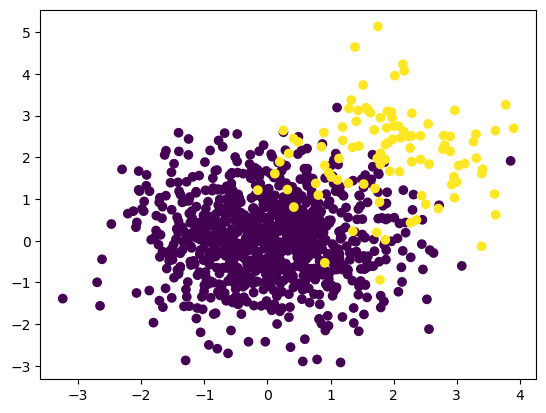

In [34]:
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'])

In [37]:
oversample = SMOTE()

In [44]:
x,y = oversample.fit_resample(df[['feature_1', 'feature_2']], df['target'])

In [45]:
x

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,1.922796,1.872630
1796,1.131954,1.500400
1797,1.649875,0.204997
1798,2.556543,1.840588


In [46]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [47]:
df1=pd.DataFrame(x,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

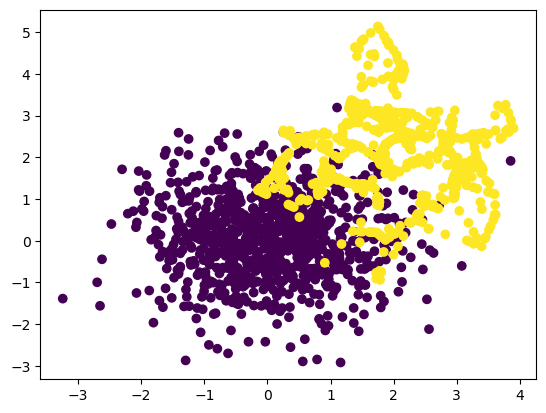

In [48]:
plt.scatter(oversample_df['feature_1'],oversample_df['feature_2'],c=oversample_df['target'])

In [49]:
oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64